In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\Manoj\\Desktop\\Edureka_Python')

In [2]:
data = pd.read_csv("driver-data.csv")
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
from sklearn.cluster import KMeans

In [13]:
x = data.iloc[:,1:].values
x
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


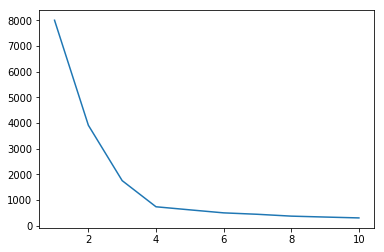

In [9]:
plt.plot(range(1,11),wcss)

In [10]:
kmeans = KMeans(n_clusters=4, init = 'k-means++')

In [11]:
y_km = kmeans.fit_predict(x)

In [12]:
newd = pd.concat([data, pd.DataFrame(y_km)],axis = 1)
newd.head()

,id,mean_dist_day,mean_over_speed_perc,0
0,3423311935,71.24,28,3
1,3423313212,52.53,25,3
2,3423313724,64.54,27,3
3,3423311373,55.69,22,3
4,3423310999,54.58,25,3


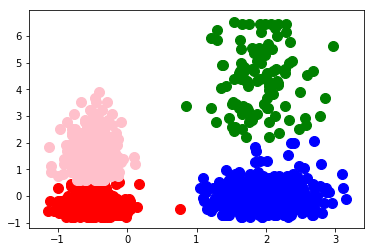

In [14]:
plt.scatter(x[y_km==0,0],x[y_km==0,1],s = 100, c = 'red',label = "Cluster 1")
plt.scatter(x[y_km==1,0],x[y_km==1,1],s = 100, c = 'blue',label = "Cluster 2")
plt.scatter(x[y_km==2,0],x[y_km==2,1],s = 100, c = 'green',label = "Cluster 3")
plt.scatter(x[y_km==3,0],x[y_km==3,1],s = 100, c = 'pink',label = "Cluster 4")